Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


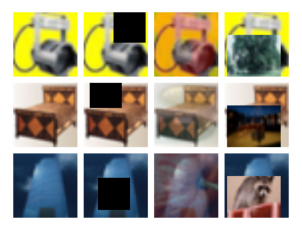

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.datasets as dataset
import torch.utils.data as data_utils
import torchvision.utils as utils
import torchvision.transforms as transforms 
from utils import cutout
from utils import mixup
from utils import cutmix
from copy import deepcopy

# torch.manual_seed(19)
transform_train = transforms.Compose(
    [transforms.Resize(256),
     transforms.ToTensor()])

data = dataset.CIFAR100(root="../datasets/cifar100",
                        train=True,
                        transform=transform_train,
                        download=True)

data_loader = data_utils.DataLoader(dataset=data,  
                                    batch_size=128, 
                                    shuffle=True)

first_imgs = []
second_imgs = []
third_imgs = []
np.random.seed(1234)
idx = np.random.choice(128, 3, replace=False)

# 1, pure images
imgs, labels = next(iter(data_loader))
first_imgs.append(imgs[idx[0]])
second_imgs.append(imgs[idx[1]])
third_imgs.append(imgs[idx[2]])

# 2, cutout images
cut = cutout.Cutout(length=128)
first_imgs.append(cut(imgs[idx[0]]))
second_imgs.append(cut(imgs[idx[1]]))
third_imgs.append(cut(imgs[idx[2]]))

# 3, mixup images
img_copy1 = deepcopy(imgs)
mixup_imgs = mixup.mixup_data(img_copy1, labels, alpha=0.3, use_cuda=False)[0]
first_imgs.append(mixup_imgs[idx[0]])
second_imgs.append(mixup_imgs[idx[1]])
third_imgs.append(mixup_imgs[idx[2]])

# 4, cutmix images
img_copy2 = deepcopy(imgs)
cutmix_imgs = cutmix.cutmix_data(img_copy2, labels, use_cuda=False)[0]
first_imgs.append(cutmix_imgs[idx[0]])
second_imgs.append(cutmix_imgs[idx[1]])
third_imgs.append(cutmix_imgs[idx[2]])

images = utils.make_grid(first_imgs + second_imgs + third_imgs, nrow=4, padding=25, pad_value = 255)
images = images.numpy().transpose(1, 2, 0)
plt.imshow(images)
plt.axis('off')
plt.show()
